# Baseline решение для задачи ВкусВилл

#### 15 ноября 2017
#### Попов Артём, artems-07@mail.ru

Код в данном отчёте написан на языке Python3.

In [1]:
import pandas as pd
import numpy as np

# data routine
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.preprocessing import LabelEncoder
from sklearn.cross_validation import train_test_split

# models
from sklearn.linear_model import LogisticRegression
from lightgbm import LGBMClassifier

# metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import log_loss
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

#visualization
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import rc
# or Verdana
font = {'family': 'DejaVu Sans',
        'weight': 'normal',
       'size':11}
rc('font', **font)


import json
import itertools

import sys
# sys.path.append('../ml_utils')

# from sklearn.ensemble import BaggingClassifier as Blender

/home/mks/intent/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
data_train = pd.read_csv('./train_data/X_train.csv', index_col=0)
data_test = pd.read_csv('./train_data/X_test.csv', index_col=0)

# y_train = data_train['Тип жалобы'].as_matrix()
# y_test = data_test['Тип жалобы'].as_matrix()
# X_train = data_train['Lemmatized'] + ' ' + data_train['Ngramms'] + ' ' + data_train['Источник']
# X_test = data_test['Lemmatized'] + ' ' + data_test['Ngramms'] + ' ' + data_test['Источник']

y_train = data_train['Категория жалобы'].as_matrix()
y_test = data_test['Категория жалобы'].as_matrix()
X_train = data_train['Lemmatized'] + ' ' + data_train['Ngramms'] + ' ' + data_train['Источник']
X_test = data_test['Lemmatized'] + ' ' + data_test['Ngramms'] + ' ' + data_test['Источник']

/home/mks/intent/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (6,7,8,9,10,11,13,14,16) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [6]:
# with open('../../data/target_mapping.json', 'r') as f:
#     category_description = json.load(f)

print(X_test[75])

супер треш лишний убедиться жеж мучной муж извлечь ротовой полость завтрак стекло хлеб лишний_раз_убедиться ротовой_полость source_5_Вконтакте


In [7]:
vectorizer = CountVectorizer(min_df=5)
vectorizer.fit(X_train)
X_train = vectorizer.transform(X_train)
X_test = vectorizer.transform(X_test)

In [9]:
print(X_train)

  (0, 36)	1
  (0, 47)	1
  (0, 60)	1
  (0, 73)	1
  (0, 405)	1
  (0, 570)	1
  (0, 1134)	1
  (0, 1325)	1
  (0, 2837)	1
  (0, 3806)	1
  (0, 3807)	1
  (0, 3866)	1
  (0, 4589)	1
  (0, 4591)	2
  (0, 6690)	1
  (0, 6713)	1
  (0, 7208)	1
  (0, 8654)	1
  (0, 11496)	1
  (0, 12375)	1
  (0, 13627)	1
  (0, 13628)	1
  (0, 13755)	1
  (1, 70)	1
  (1, 4692)	1
  :	:
  (37059, 7057)	1
  (37059, 8708)	1
  (37059, 9402)	1
  (37059, 9535)	1
  (37059, 10993)	1
  (37059, 11016)	1
  (37059, 11019)	1
  (37060, 29)	1
  (37060, 74)	1
  (37060, 86)	1
  (37060, 1147)	1
  (37060, 7253)	1
  (37060, 9674)	1
  (37060, 11188)	1
  (37061, 29)	1
  (37061, 74)	1
  (37061, 86)	1
  (37061, 2233)	1
  (37061, 2821)	1
  (37061, 2827)	1
  (37061, 2974)	1
  (37061, 3484)	1
  (37061, 7247)	1
  (37061, 7253)	1
  (37061, 8786)	1


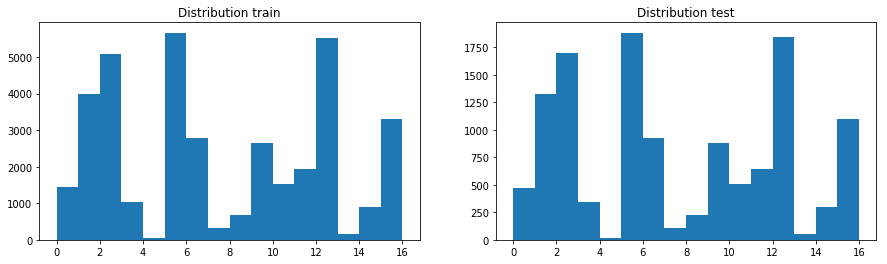

In [20]:
fig, ax = plt.subplots()
fig.set_figwidth(15)

plt.subplot(1, 2, 1)
plt.title('Distribution train')
plt.hist(y_train, bins=16)  # 70

plt.subplot(1, 2, 2)
plt.title('Distribution test')
plt.hist(y_test, bins=16)  # 70
plt.show()

In [26]:
category_description = [i for i in range(17)]


In [53]:
def get_result(clf, X_train, y_train, X_test, y_test):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print('accuracy : {}'.format(accuracy_score(y_pred, y_test)))
    y_pred_prob = clf.predict_proba(X_test)
    print('log_loss: {}'.format(log_loss(y_test, y_pred_prob)))
    
    for i in range(len(category_description)):
        y_bin_pred = np.zeros(y_pred.shape)
        y_bin_pred[y_pred == i] = 1
        y_bin_answ = np.zeros(y_pred.shape)
        y_bin_answ[y_test == i] = 1
        
        precision_tmp = precision_score(y_bin_answ, y_bin_pred)
        recall_tmp = recall_score(y_bin_answ, y_bin_pred)
        if recall_tmp == 0 and precision_tmp == 0:
            f1_tmp = 0.
        else:
            f1_tmp = 2*recall_tmp*precision_tmp/(precision_tmp + recall_tmp)

        string_to_format = '{:7} number_test_objects: {:4}   precision: {:5.3}   recall: {:5.3}  f1: {:5.3}'
        print(string_to_format.format(category_description[i],
                                      y_bin_answ[y_test == i].shape[0],
                                      precision_tmp,
                                      recall_tmp,
                                      f1_tmp))
    
    f1_macro = f1_score(y_test, y_pred, average='macro')
    f1_micro = f1_score(y_test, y_pred, average='micro')
    f1_weighted = f1_score(y_test, y_pred, average='weighted')
    
    print('F1 macro: {0:1.3}'.format(f1_macro))
    print('F1 micro: {0:1.3}'.format(f1_micro))
    print('F1 weighted: {0:1.3}'.format(f1_weighted))
    
    return None

## Первый бейзлайн: Логистическая регрессия на Bag of words

In [50]:
clf = LogisticRegression(n_jobs=-1, solver='lbfgs')

In [54]:
get_result(clf, X_train, y_train, X_test, y_test)

accuracy : 0.7468333874634622
log_loss: 0.9026501195854533
      0 number_test_objects:  475   precision: 0.911   recall: 0.817  f1: 0.861
      1 number_test_objects: 1327   precision: 0.688   recall: 0.783  f1: 0.732
      2 number_test_objects: 1696   precision: 0.594   recall:  0.67  f1:  0.63
      3 number_test_objects:  340   precision: 0.985   recall: 0.991  f1: 0.988
      4 number_test_objects:   20   precision:   0.0   recall:   0.0  f1:   0.0
      5 number_test_objects: 1882   precision: 0.814   recall: 0.876  f1: 0.844
      6 number_test_objects:  928   precision: 0.701   recall: 0.421  f1: 0.526
      7 number_test_objects:  110   precision: 0.477   recall: 0.191  f1: 0.273
      8 number_test_objects:  227   precision: 0.669   recall: 0.445  f1: 0.534
      9 number_test_objects:  878   precision: 0.845   recall: 0.659  f1: 0.741
     10 number_test_objects:  510   precision: 0.574   recall: 0.637  f1: 0.604
     11 number_test_objects:  640   precision: 0.684   recall

Как смотреть на confusion matrix с таким числом классов пока не придумал:

In [55]:
y_pred = clf.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)

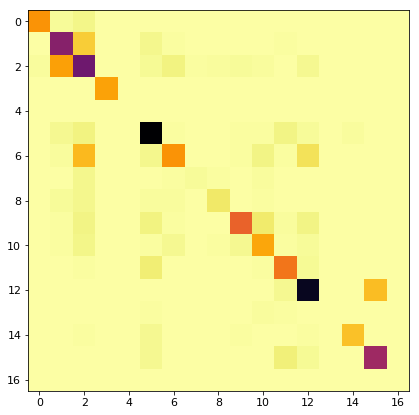

In [56]:
fig, ax = plt.subplots()
fig.set_figwidth(7)
fig.set_figheight(7)

plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.inferno_r)

In [57]:
important_categories = category_description
# + category_description[12:14] + category_description[25:38] + \
#                        [category_description[39]]

Text(267.85,0.5,'True label')

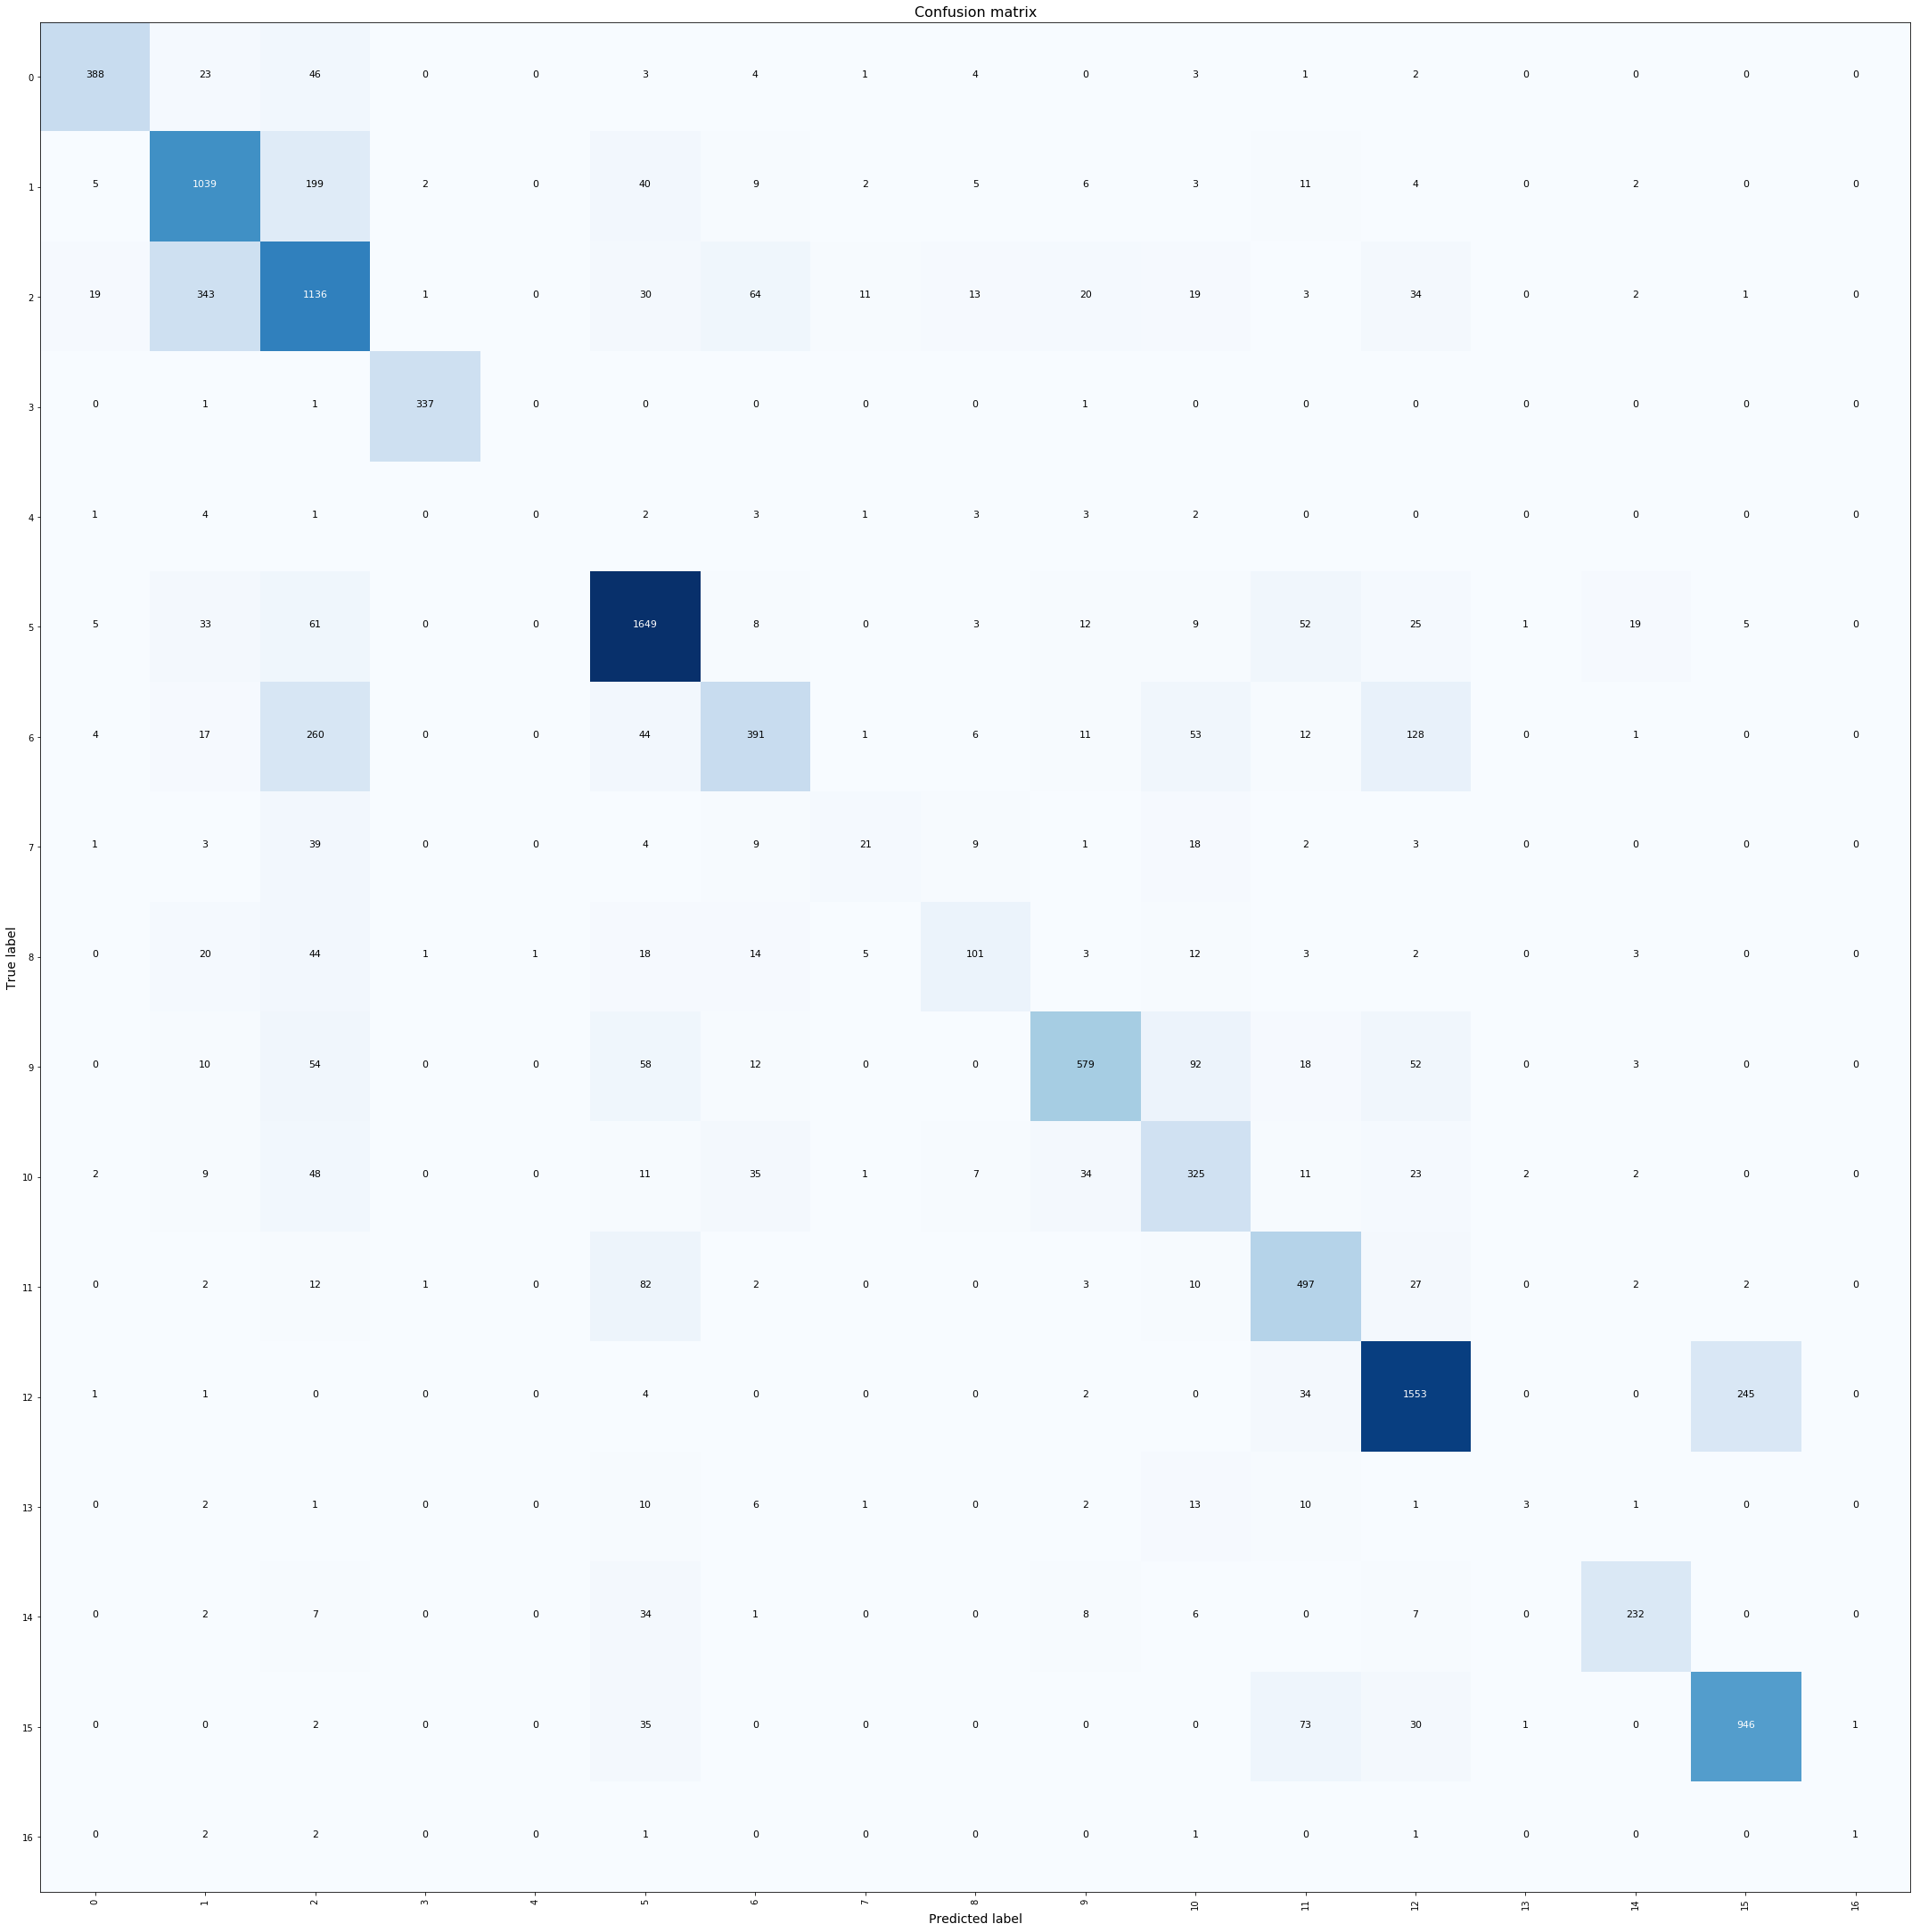

In [58]:
cnf_matrix = confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots()
fig.set_figwidth(30)
fig.set_figheight(30)

plt.imshow(cnf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion matrix', fontsize=16)

plt.xticks(np.arange(0, len(important_categories)), important_categories, rotation=90, fontsize=10)
plt.yticks(np.arange(0, len(important_categories)), important_categories, fontsize=10)

fmt = 'd'
thresh = cnf_matrix.max() / 2.
for i, j in itertools.product(np.arange(cnf_matrix.shape[0]), np.arange(cnf_matrix.shape[1])):
    plt.text(j, i, format(cnf_matrix[i, j], fmt),
             horizontalalignment="center",
             color="white" if cnf_matrix[i, j] > thresh else "black")

plt.tight_layout()
plt.xlabel('Predicted label', fontsize=14)
plt.ylabel('True label', fontsize=14)
# plt.savefig('confusion_matrix_bow_truncated.pdf')

## Второй бейзлайн: Логистическая регрессия на TF-iDF

In [10]:
print(X_train)

  (0, 36)	1
  (0, 47)	1
  (0, 60)	1
  (0, 73)	1
  (0, 405)	1
  (0, 570)	1
  (0, 1134)	1
  (0, 1325)	1
  (0, 2837)	1
  (0, 3806)	1
  (0, 3807)	1
  (0, 3866)	1
  (0, 4589)	1
  (0, 4591)	2
  (0, 6690)	1
  (0, 6713)	1
  (0, 7208)	1
  (0, 8654)	1
  (0, 11496)	1
  (0, 12375)	1
  (0, 13627)	1
  (0, 13628)	1
  (0, 13755)	1
  (1, 70)	1
  (1, 4692)	1
  :	:
  (37059, 7057)	1
  (37059, 8708)	1
  (37059, 9402)	1
  (37059, 9535)	1
  (37059, 10993)	1
  (37059, 11016)	1
  (37059, 11019)	1
  (37060, 29)	1
  (37060, 74)	1
  (37060, 86)	1
  (37060, 1147)	1
  (37060, 7253)	1
  (37060, 9674)	1
  (37060, 11188)	1
  (37061, 29)	1
  (37061, 74)	1
  (37061, 86)	1
  (37061, 2233)	1
  (37061, 2821)	1
  (37061, 2827)	1
  (37061, 2974)	1
  (37061, 3484)	1
  (37061, 7247)	1
  (37061, 7253)	1
  (37061, 8786)	1


In [11]:
tfidf_transformer = TfidfTransformer()
tfidf_transformer.fit(X_train)
X_train_tfidf = tfidf_transformer.transform(X_train)
X_test_tfidf = tfidf_transformer.transform(X_test)

In [13]:
print(X_train_tfidf)

  (0, 13755)	0.17546820193730822
  (0, 13628)	0.2649885744374483
  (0, 13627)	0.19488708857102846
  (0, 12375)	0.26046770514594103
  (0, 11496)	0.20280633611419924
  (0, 8654)	0.15125258437466246
  (0, 7208)	0.18995337133117976
  (0, 6713)	0.2255800609031605
  (0, 6690)	0.13813979420411723
  (0, 4591)	0.5131031000737906
  (0, 4589)	0.19488708857102846
  (0, 3866)	0.09437212839561572
  (0, 3807)	0.26754040919215044
  (0, 3806)	0.19948267789987642
  (0, 2837)	0.22142579137003893
  (0, 1325)	0.1544551373977959
  (0, 1134)	0.14081239762749198
  (0, 570)	0.21499240634663877
  (0, 405)	0.15717150329253704
  (0, 73)	0.09749928119559402
  (0, 60)	0.09749928119559402
  (0, 47)	0.09705777349145503
  (0, 36)	0.09749119416981766
  (1, 11720)	0.5030119798151372
  (1, 7410)	0.4072629914449794
  :	:
  (37059, 6137)	0.1879500431659263
  (37059, 4986)	0.16548653541428493
  (37059, 1508)	0.17230865909634036
  (37059, 659)	0.14072102030954806
  (37059, 76)	0.2244092435686669
  (37059, 29)	0.2653333581201

In [60]:
clf = LogisticRegression(n_jobs=-1, solver='lbfgs')

In [61]:
get_result(clf, X_train_tfidf, y_train, X_test_tfidf, y_test)

accuracy : 0.7543033452419616
log_loss: 0.839479002941371
      0 number_test_objects:  475   precision: 0.913   recall:   0.8  f1: 0.853
      1 number_test_objects: 1327   precision:  0.67   recall: 0.791  f1: 0.725
      2 number_test_objects: 1696   precision:  0.56   recall: 0.698  f1: 0.621
      3 number_test_objects:  340   precision: 0.988   recall: 0.956  f1: 0.972
      4 number_test_objects:   20   precision:   0.0   recall:   0.0  f1:   0.0
      5 number_test_objects: 1882   precision: 0.786   recall: 0.915  f1: 0.846
      6 number_test_objects:  928   precision: 0.749   recall: 0.505  f1: 0.604
      7 number_test_objects:  110   precision: 0.542   recall: 0.118  f1: 0.194
      8 number_test_objects:  227   precision: 0.711   recall: 0.379  f1: 0.494
      9 number_test_objects:  878   precision:  0.86   recall: 0.657  f1: 0.745
     10 number_test_objects:  510   precision: 0.606   recall: 0.633  f1: 0.619
     11 number_test_objects:  640   precision: 0.724   recall:

/home/mks/intent/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/mks/intent/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [62]:
conf_matrix = confusion_matrix(y_test, y_pred)

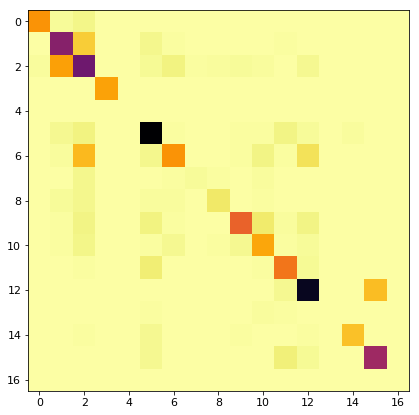

In [63]:
fig, ax = plt.subplots()
fig.set_figwidth(7)
fig.set_figheight(7)

plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.inferno_r)


Text(267.85,0.5,'True label')

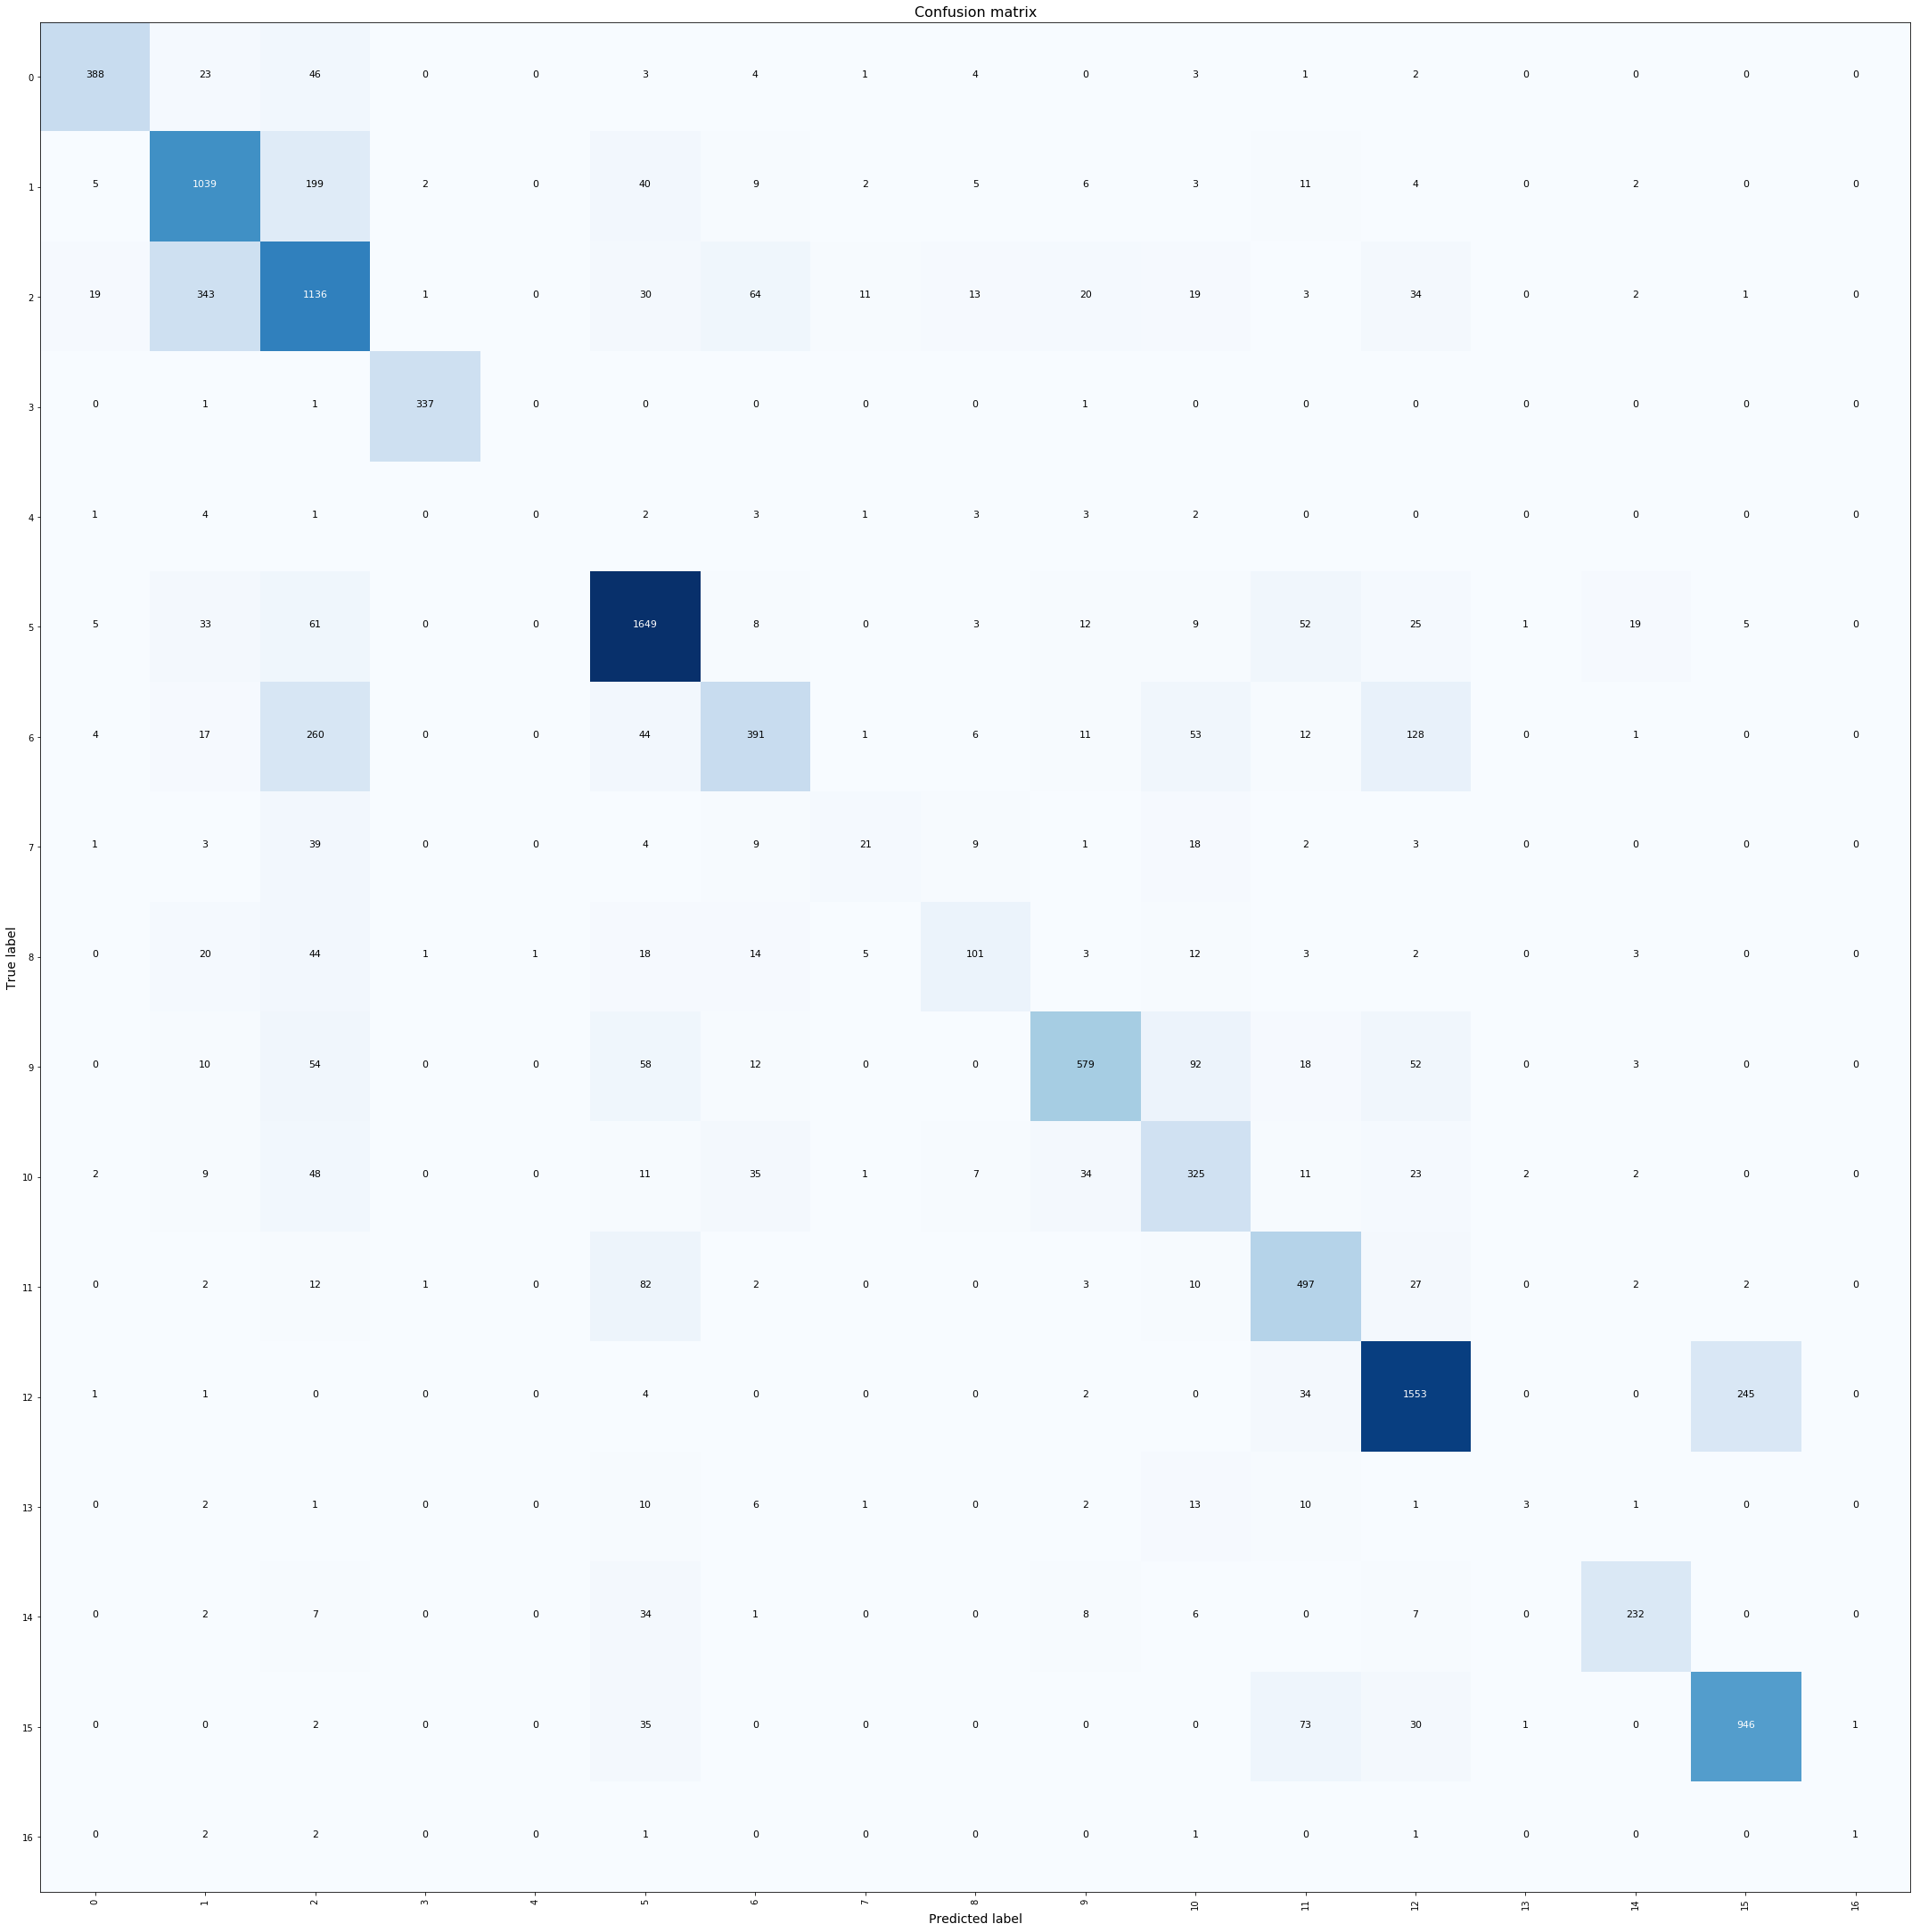

In [64]:
cnf_matrix = confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots()
fig.set_figwidth(30)
fig.set_figheight(30)

plt.imshow(cnf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion matrix', fontsize=16)

plt.xticks(np.arange(0, len(important_categories)), important_categories, rotation=90, fontsize=10)
plt.yticks(np.arange(0, len(important_categories)), important_categories, fontsize=10)

fmt = 'd'
thresh = cnf_matrix.max() / 2.
for i, j in itertools.product(np.arange(cnf_matrix.shape[0]), np.arange(cnf_matrix.shape[1])):
    plt.text(j, i, format(cnf_matrix[i, j], fmt),
             horizontalalignment="center",
             color="white" if cnf_matrix[i, j] > thresh else "black")

plt.tight_layout()
plt.xlabel('Predicted label', fontsize=14)
plt.ylabel('True label', fontsize=14)
#plt.savefig('confusion_matrix_tfidf_truncated.pdf')

## Бустинг на bow

In [65]:
clf = LGBMClassifier(n_estimators=200, n_jobs=-1, learning_rate=0.1)

In [66]:
get_result(clf, X_train.astype('float'), y_train, X_test.astype('float'), y_test)

/home/mks/intent/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


accuracy : 0.7441539460863917
log_loss: 0.830978351190809
      0 number_test_objects:  475   precision: 0.893   recall: 0.823  f1: 0.857
      1 number_test_objects: 1327   precision: 0.689   recall: 0.766  f1: 0.726
      2 number_test_objects: 1696   precision: 0.587   recall: 0.682  f1: 0.631
      3 number_test_objects:  340   precision: 0.983   recall:   1.0  f1: 0.991
      4 number_test_objects:   20   precision:   0.0   recall:   0.0  f1:   0.0
      5 number_test_objects: 1882   precision: 0.807   recall: 0.878  f1: 0.841
      6 number_test_objects:  928   precision: 0.747   recall: 0.433  f1: 0.548
      7 number_test_objects:  110   precision: 0.523   recall: 0.209  f1: 0.299
      8 number_test_objects:  227   precision: 0.704   recall: 0.471  f1: 0.565
      9 number_test_objects:  878   precision: 0.837   recall: 0.589  f1: 0.691
     10 number_test_objects:  510   precision: 0.523   recall: 0.633  f1: 0.573
     11 number_test_objects:  640   precision: 0.681   recall:

/home/mks/intent/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/mks/intent/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


## Смешаем лог.рег и бустинг

In [67]:
clf1 = LGBMClassifier(n_estimators=200, n_jobs=-1, learning_rate=0.1)
clf2 = LogisticRegression(n_jobs=-1, solver='lbfgs')

In [75]:
clf = Blender([clf1, clf2], [0.3, 0.7])
clf.fit([X_train.astype('float'), X_train_tfidf], y_train)

ValueError: Expected 2D array, got 1D array instead:
array=[<37062x14000 sparse matrix of type '<class 'numpy.float64'>'
	with 668783 stored elements in Compressed Sparse Row format>
 <37062x14000 sparse matrix of type '<class 'numpy.float64'>'
	with 668783 stored elements in Compressed Sparse Row format>].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [37]:
for alpha in np.linspace(0, 1, 20):
    clf._weights = [alpha, 1 - alpha]
    print(alpha, accuracy_score(y_test, clf.predict([X_test.astype('float'), X_test_tfidf])))

0.0 0.6554975453907894
0.05263157894736842 0.6604067638120471
0.10526315789473684 0.6639133483986597
0.15789473684210525 0.6673420088833476
0.21052631578947367 0.6682770981064443
0.2631578947368421 0.6699914283487883
0.3157894736842105 0.670069352450713
0.3684210526315789 0.6708485934699603
0.42105263157894735 0.6702252006545625
0.47368421052631576 0.6705368970622614
0.5263157894736842 0.6696797319410894
0.5789473684210527 0.6692901114314658
0.631578947368421 0.6684329463102938
0.6842105263157894 0.6684329463102938
0.7368421052631579 0.6680433258006702
0.7894736842105263 0.6667965401698746
0.8421052631578947 0.6662510714564015
0.894736842105263 0.666095223252552
0.9473684210526315 0.6659393750487026
1.0 0.6650042858256059


In [38]:
clf = Blender([clf1, clf2], [0.35, 0.65])

In [39]:
get_result(clf, [X_train.astype('float'), X_train_tfidf], y_train,
           [X_test.astype('float'), X_test_tfidf], y_test)

accuracy : 0.6711602898776592
log_loss: 1.200712720064169
01_10 Стекло                                    number_test_objects:   19   precision: 0.917   recall: 0.579
01_11 Грязь                                     number_test_objects:   54   precision:   0.4   recall: 0.185
01_2 Пластик                                    number_test_objects:   49   precision:  0.75   recall: 0.551
01_3 Насекомое                                  number_test_objects:   82   precision: 0.679   recall: 0.671
01_4 Металлический предмет                      number_test_objects:   32   precision: 0.783   recall: 0.562
01_5 Волос                                      number_test_objects:   63   precision:   0.8   recall: 0.889
01_6 Нить/верёвка                               number_test_objects:   22   precision:   0.5   recall: 0.227
01_7 Камень                                     number_test_objects:   34   precision: 0.806   recall: 0.735
01_8 Кость/ скорлупа                            number_test_objects:  

/home/homer/miniconda3/envs/arti_base_env/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


06_8 Благодарность продавцу                     number_test_objects:  359   precision: 0.863   recall: 0.897
06_9 Продажа просроченной продукции             number_test_objects:   54   precision: 0.674   recall: 0.537
07_1 Благодарность за продукт                   number_test_objects:  929   precision:  0.66   recall: 0.856
08_1 Не нравится место производства             number_test_objects:    3   precision:   0.0   recall:   0.0
08_2 Не нравится состав продукта                number_test_objects:   71   precision:   0.4   recall: 0.169
08_3 Ошибка в составе                           number_test_objects:    6   precision:   0.0   recall:   0.0
08_4 Вопрос по составу                          number_test_objects:   31   precision: 0.333   recall: 0.0645
09_1 Ошибка на этикетке                         number_test_objects:   31   precision: 0.455   recall: 0.161
09_2 Плохая упаковка                            number_test_objects:  103   precision: 0.461   recall:  0.34
09_3 Пожелание по 